# EDA: abalone.csv

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
data = pd.read_csv('data/abalone.csv')

In [20]:
print(data.info())
print(data.head())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB
None
   id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0   M   0.455     0.365   0.095        0.5140          0.2245   
1   1   M   0.350     0.265   0.090        0.2255          0.0995   
2   2   F   0.530     0.420   0.135        0.6770          0.2565   
3   3   

In [21]:
print(data.describe())

                id       Length     Diameter       Height  Whole_weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean   2088.000000     0.523992     0.407881     0.139516      0.828742   
std    1205.940366     0.120093     0.099240     0.041827      0.490389   
min       0.000000     0.075000     0.055000     0.000000      0.002000   
25%    1044.000000     0.450000     0.350000     0.115000      0.441500   
50%    2088.000000     0.545000     0.425000     0.140000      0.799500   
75%    3132.000000     0.615000     0.480000     0.165000      1.153000   
max    4176.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked_weight  Viscera_weight  Shell_weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     

In [22]:
print(data.isnull().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


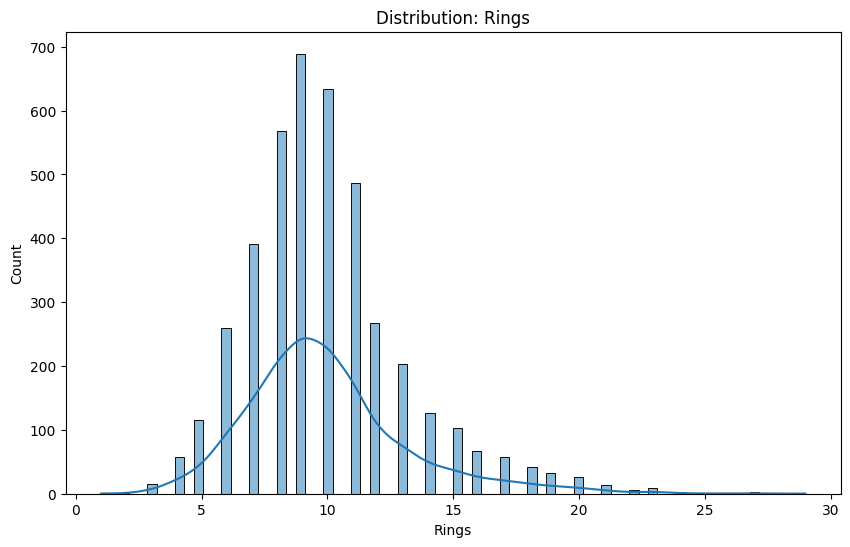

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rings'], kde=True)
plt.title('Distribution: Rings')
plt.show()

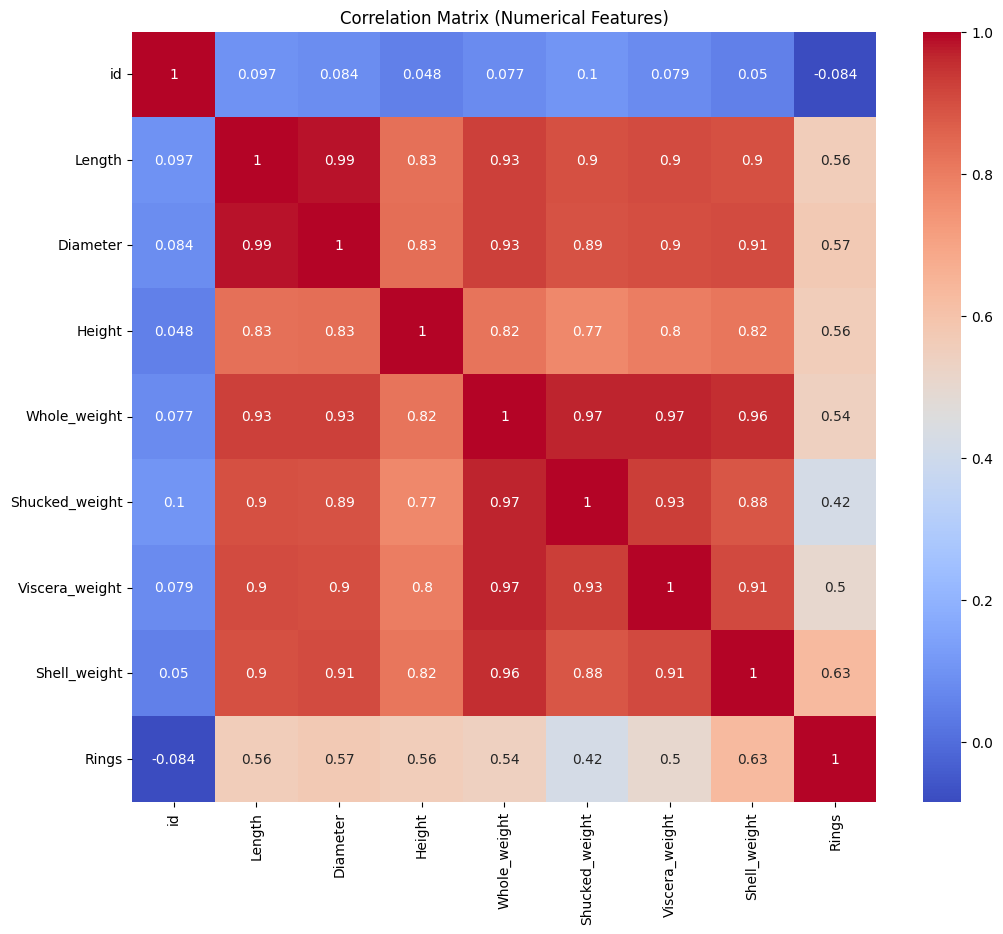

In [24]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

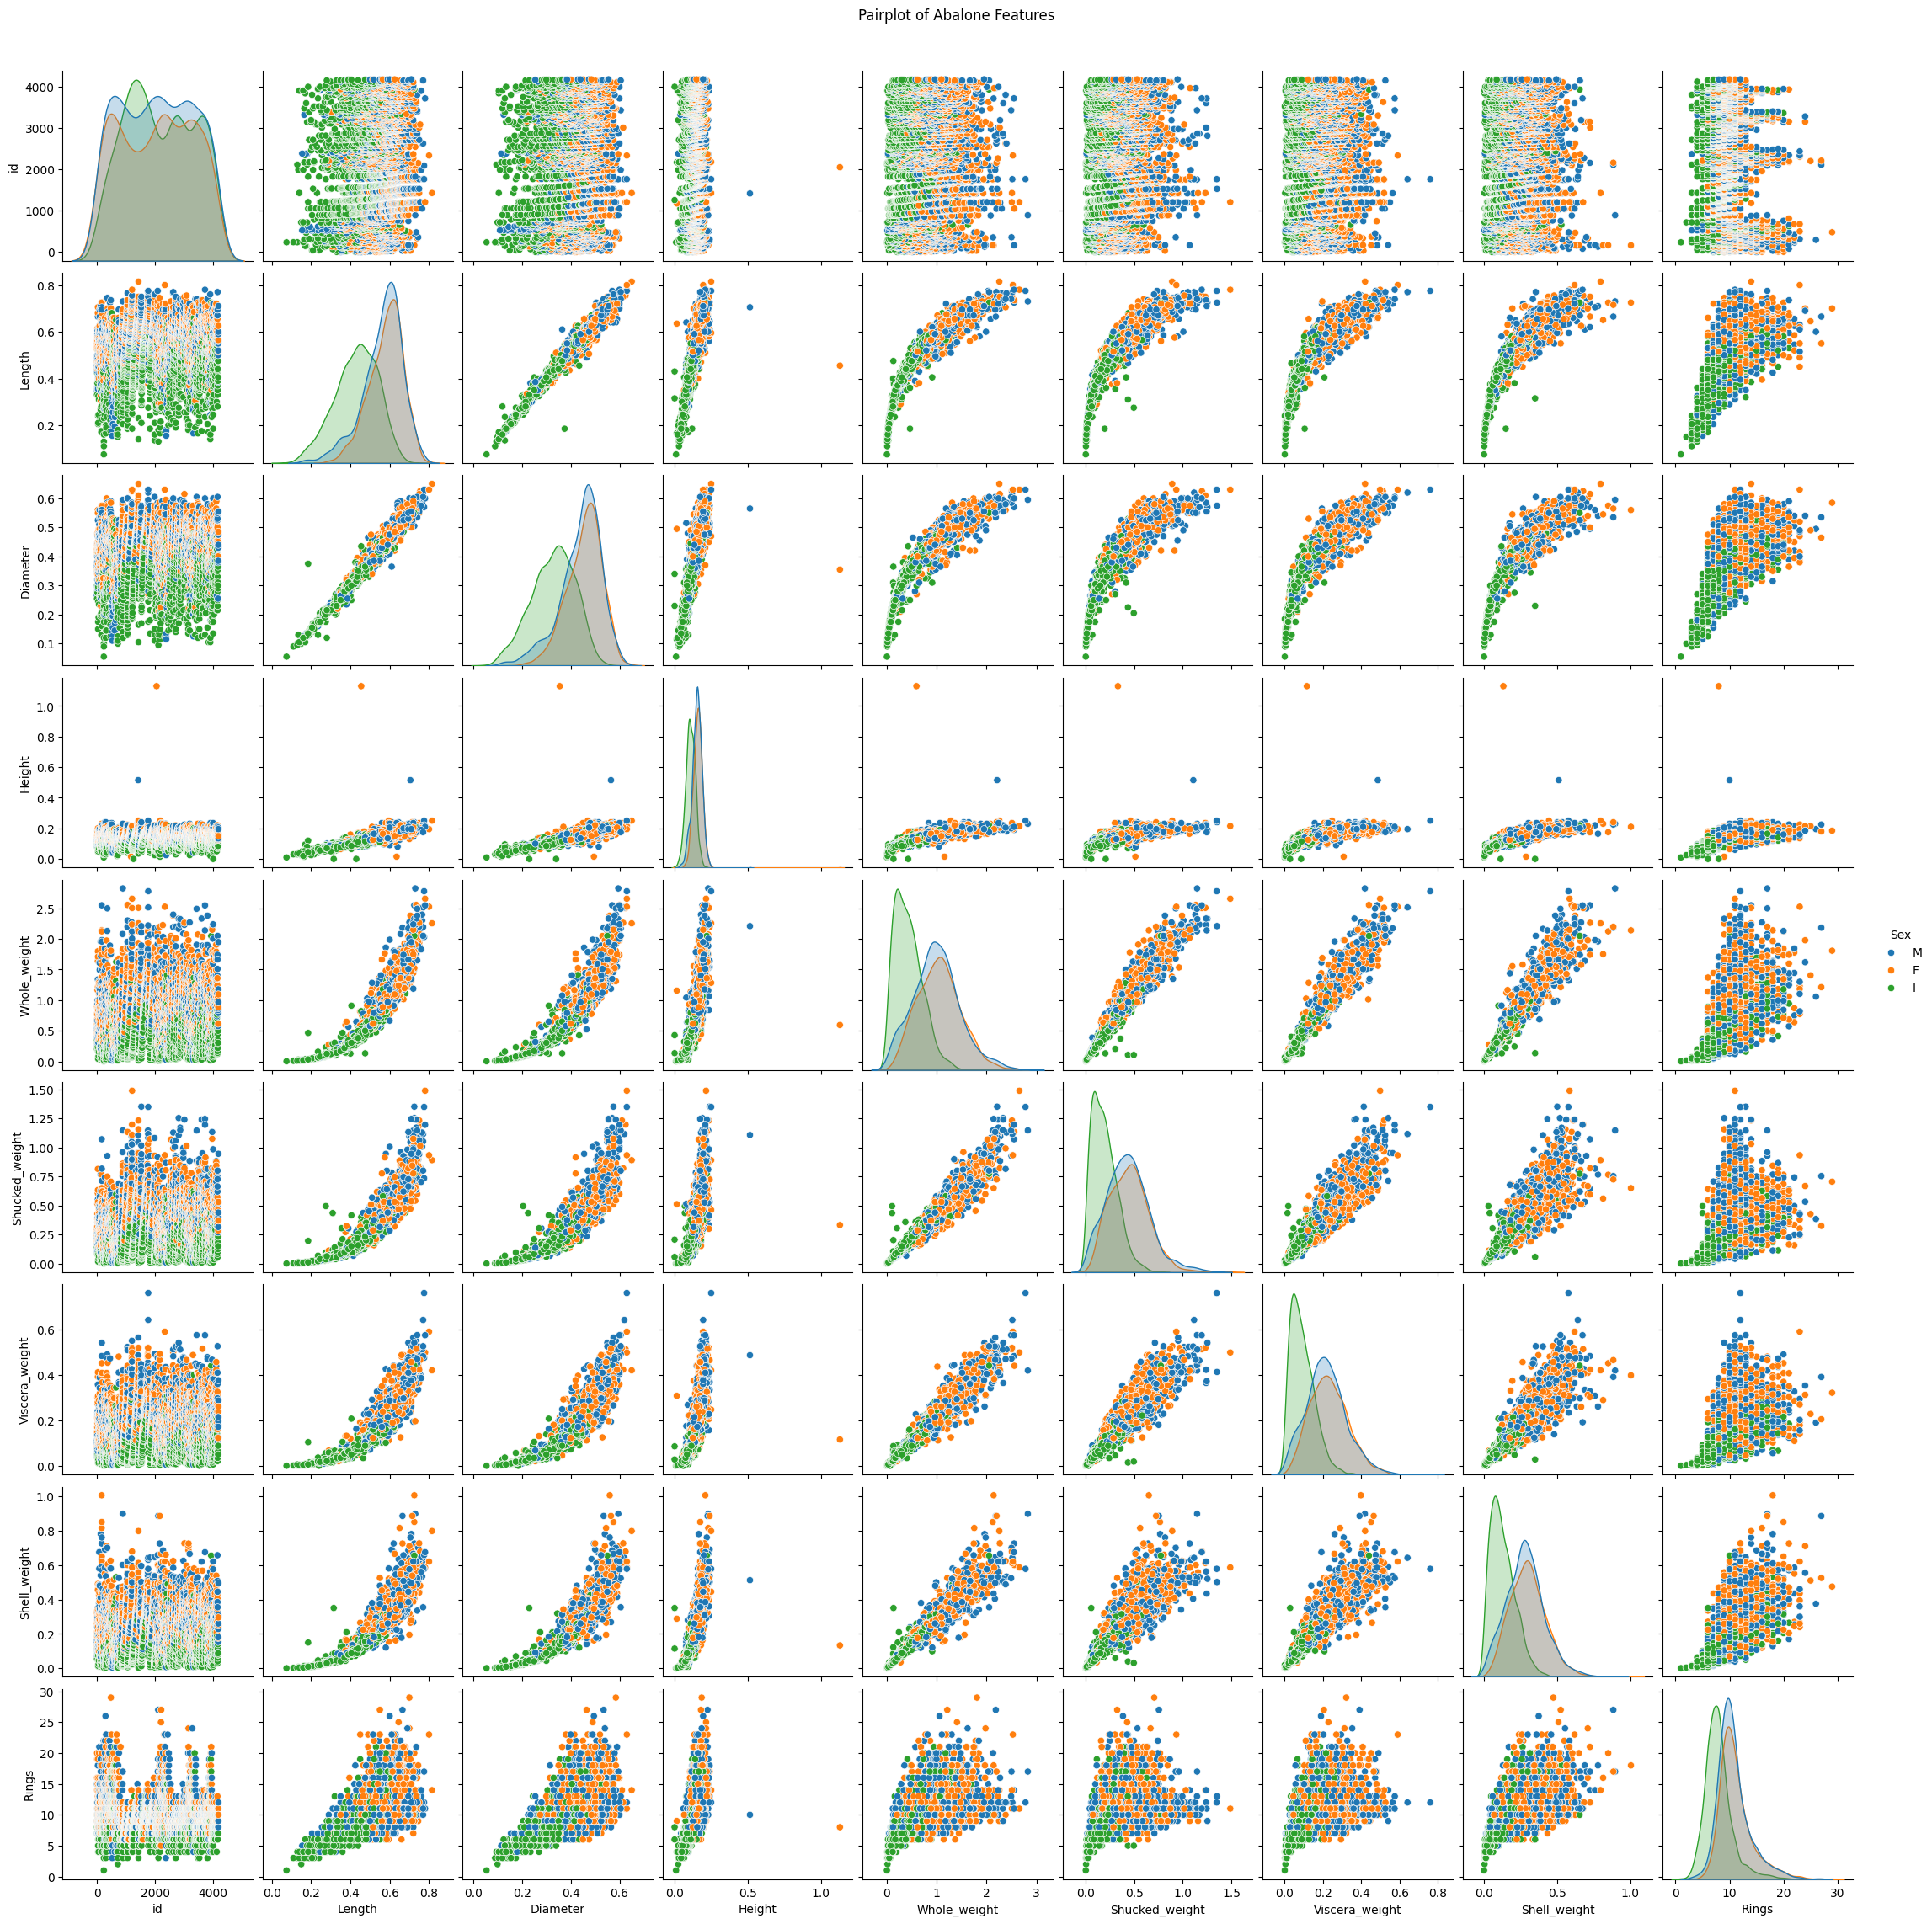

In [25]:
sns.pairplot(data, hue='Sex', height=2.5)
plt.suptitle('Pairplot of Abalone Features', y=1.02)
plt.show()

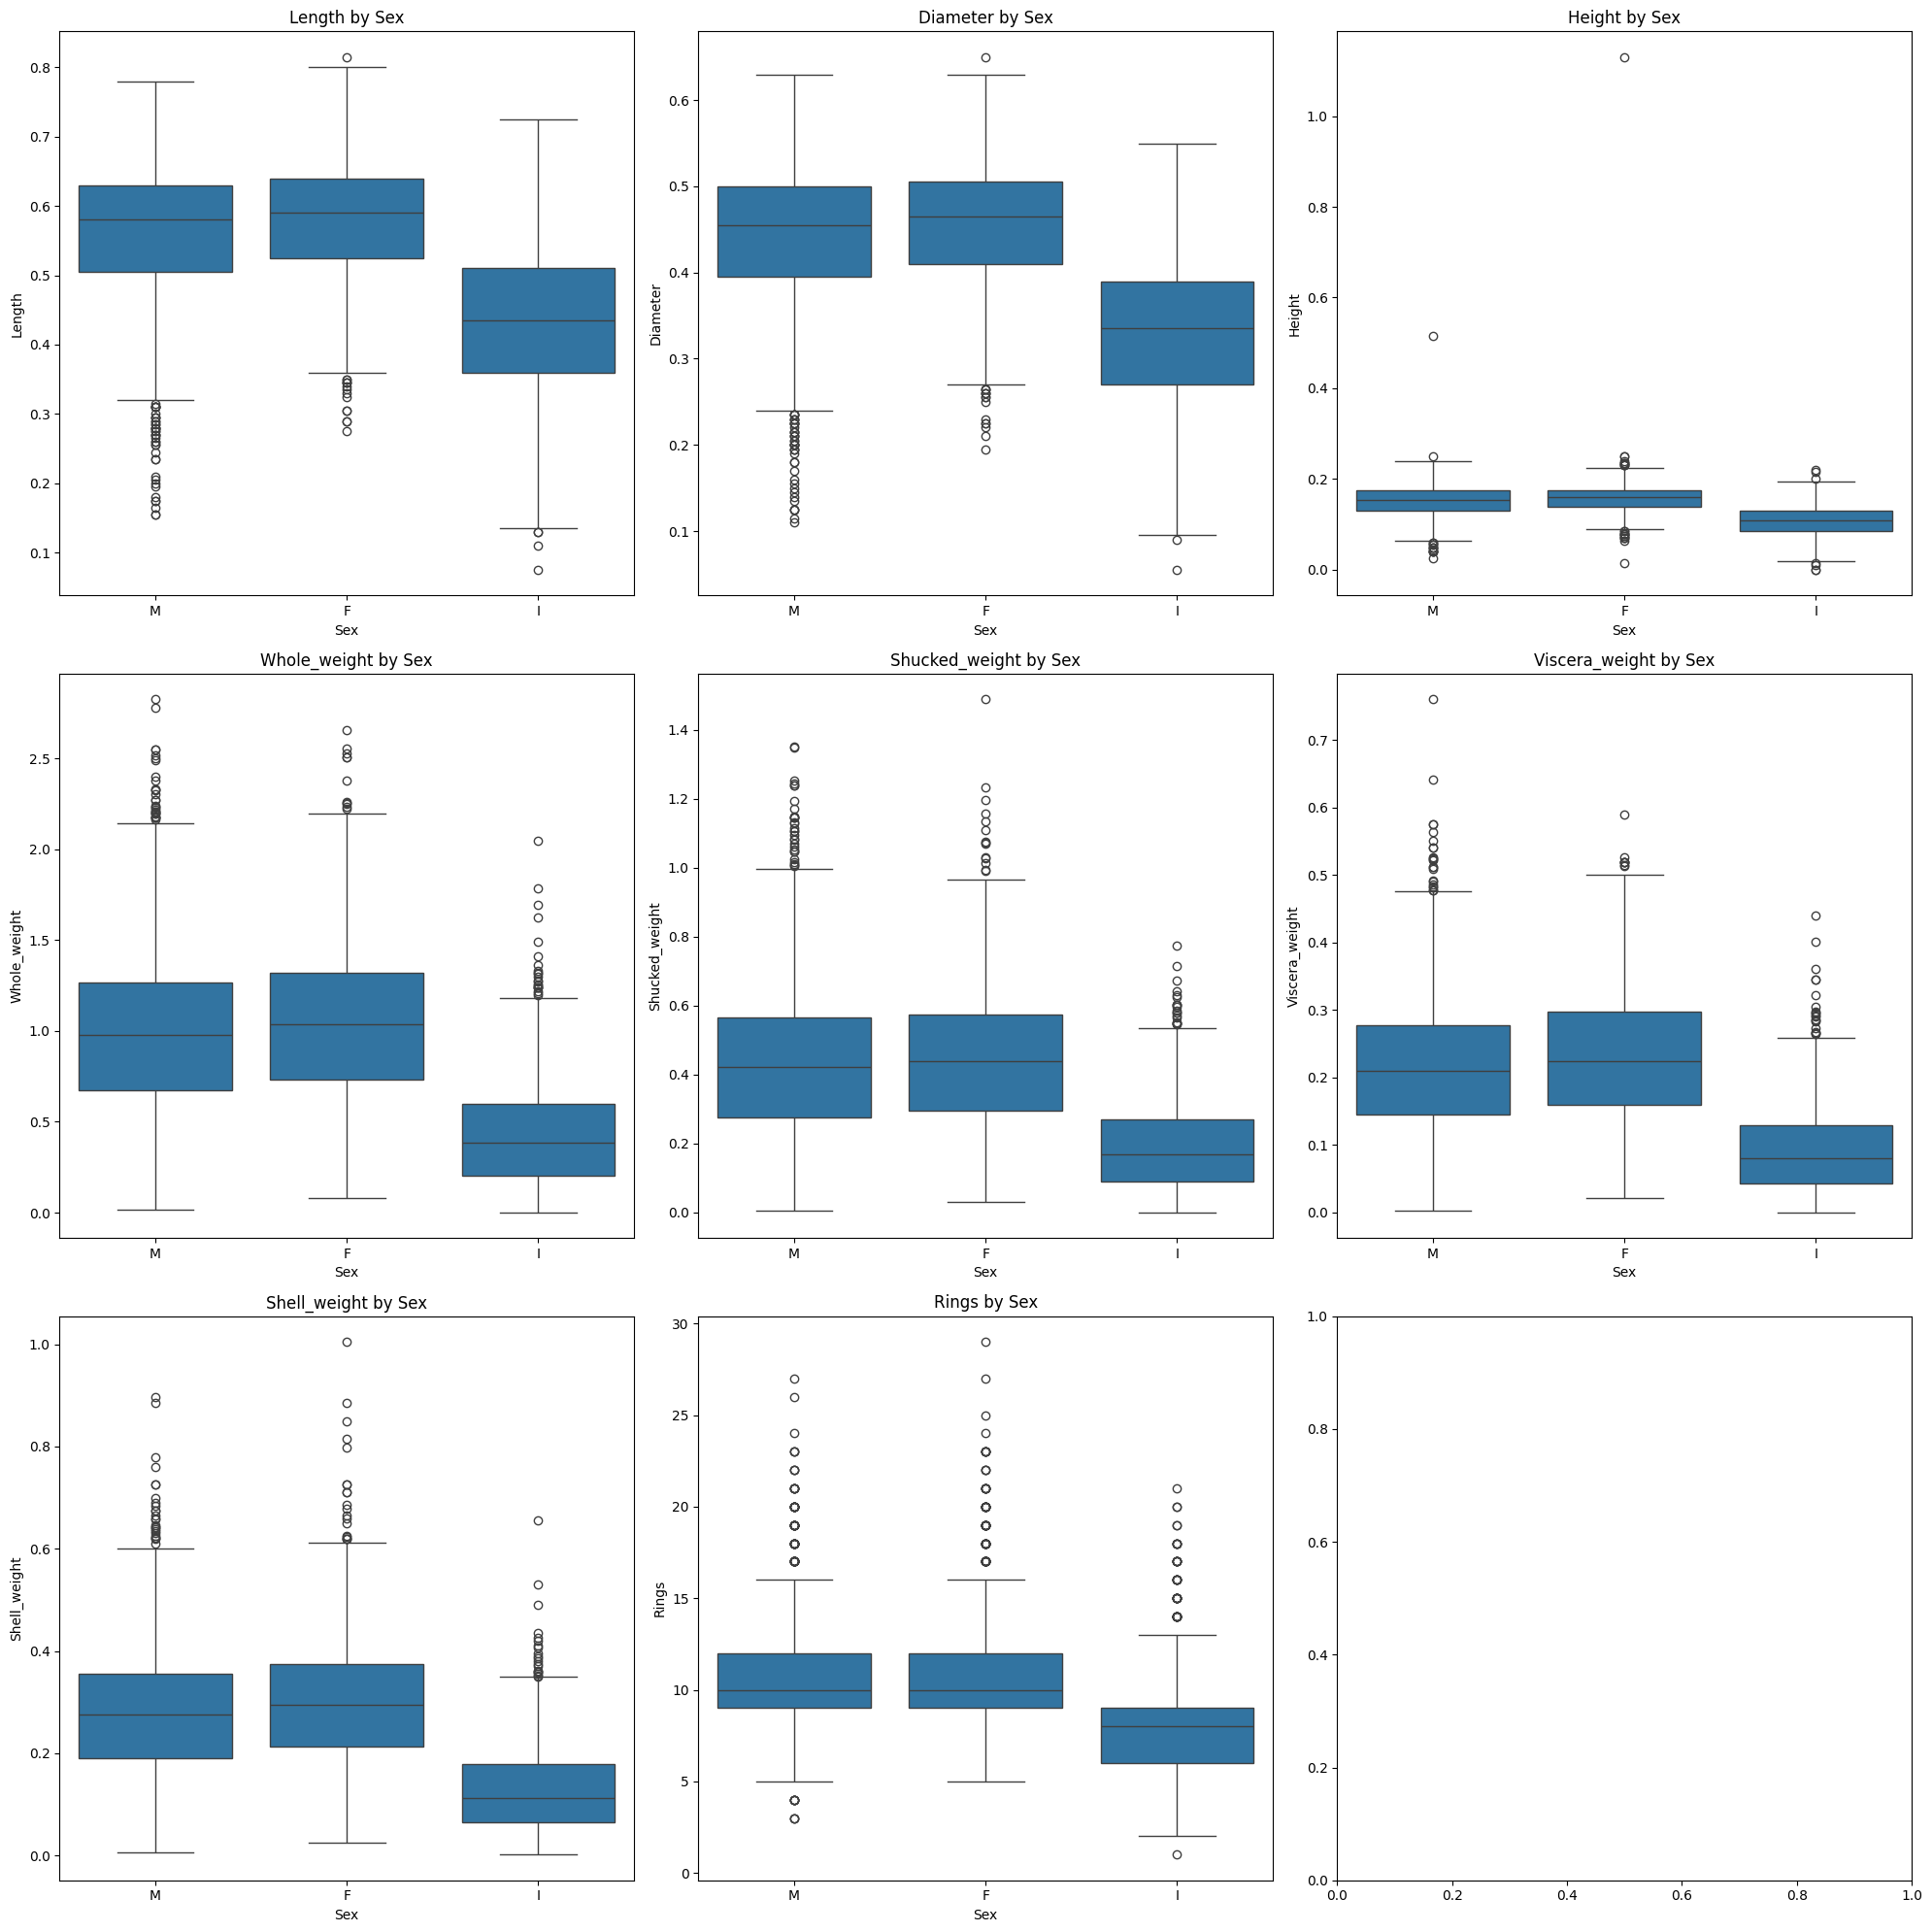

In [26]:
numerical_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Shucked_weight', 'Viscera_weight', 'Shell_weight']

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(numerical_features + ['Rings']):
    sns.boxplot(x='Sex', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} by Sex')

plt.tight_layout()
plt.show()

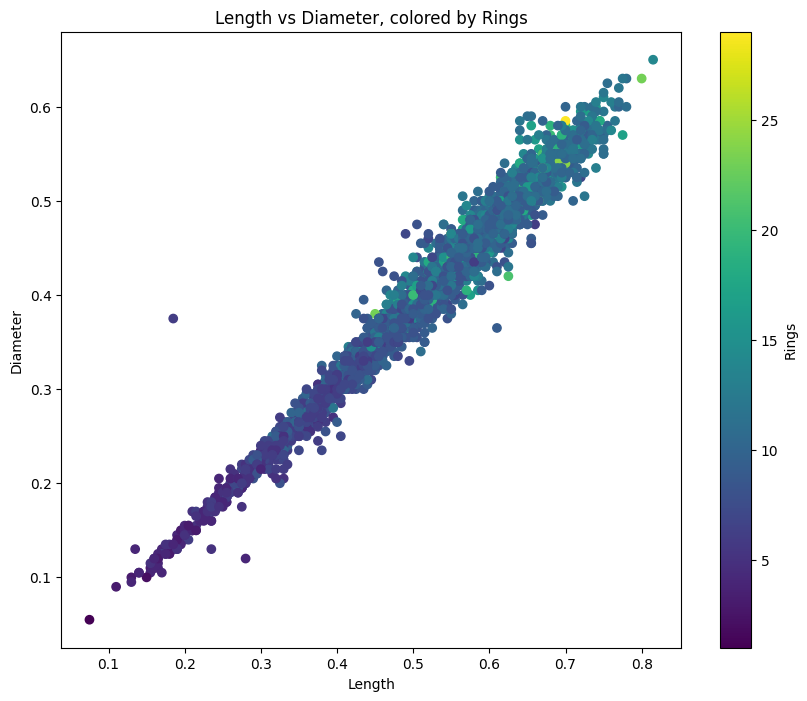

In [27]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['Length'], data['Diameter'], c=data['Rings'], cmap='viridis')
plt.colorbar(scatter, label='Rings')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Length vs Diameter, colored by Rings')
plt.show()

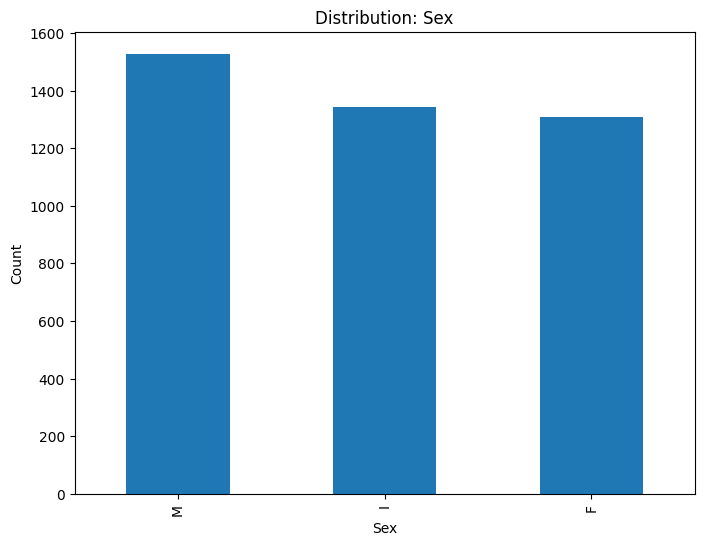

In [28]:
plt.figure(figsize=(8, 6))
data['Sex'].value_counts().plot(kind='bar')
plt.title('Distribution: Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

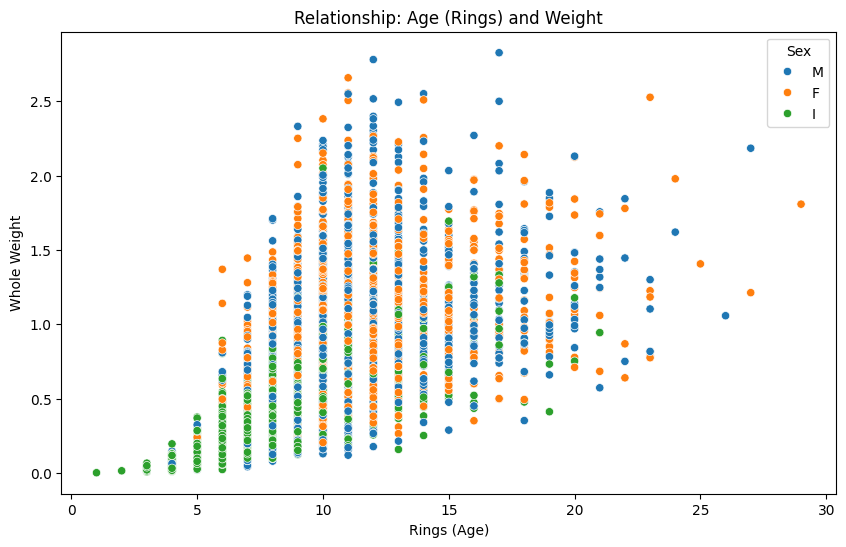

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rings', y='Whole_weight', hue='Sex', data=data)
plt.title('Relationship: Age (Rings) and Weight')
plt.xlabel('Rings (Age)')
plt.ylabel('Whole Weight')
plt.show()
